In [664]:
import pandas as pd
from sklearn.cluster import KMeans 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [665]:
%matplotlib inline

In [666]:
raw_data = pd.read_csv('cereals.csv',index_col=0)

In [667]:
raw_data.replace('-1', raw_data.mean(), inplace=True)
raw_data.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257665,0.566171,-0.071895,0.265356,0.097234,0.696091,0.087200
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025719,-0.282611,0.562174,0.007335,0.133865,0.216158,-0.244469
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.298751,0.300242,0.197832,-0.031156,0.263691,0.214625,-0.175892
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.291719,0.058026,-0.042081,0.361477,-0.069719,0.308576,0.119665
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380376,-0.138783,0.909104,-0.032243,0.297539,0.247226,-0.513061
carbo,0.257665,-0.025719,-0.298751,0.291719,-0.380376,1.000000,-0.471157,-0.359340,0.217729,-0.188915,0.138566,0.366872
sugars,0.566171,-0.282611,0.300242,0.058026,-0.138783,-0.471157,1.000000,0.001979,0.097577,0.067868,0.455786,-0.048618
potass,-0.071895,0.562174,0.197832,-0.042081,0.909104,-0.359340,0.001979,1.000000,-0.004677,0.382952,0.419898,-0.499552
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.217729,0.097577,-0.004677,1.000000,0.299262,0.320324,0.128405
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.188915,0.067868,0.382952,0.299262,1.000000,0.190762,-0.335269


In [676]:
cleaner_data = raw_data.drop(["mfr", "type", "shelf"], axis=1)
cleaner_data = raw_data.loc[:,['fiber','carbo', 'sugars','potass']]
# cleaner_data = np.asarray(cleaner_data)
cleaner_data

,fiber,carbo,sugars,potass
name,,,,
100%_Bran,10.0,5.000000,6.000000,280.000000
100%_Natural_Bran,2.0,8.000000,8.000000,135.000000
All-Bran,9.0,7.000000,5.000000,320.000000
All-Bran_with_Extra_Fiber,14.0,8.000000,0.000000,330.000000
Almond_Delight,1.0,14.000000,8.000000,96.077922
Apple_Cinnamon_Cheerios,1.5,10.500000,10.000000,70.000000
Apple_Jacks,1.0,11.000000,14.000000,30.000000
Basic_4,2.0,18.000000,8.000000,100.000000
Bran_Chex,4.0,15.000000,6.000000,125.000000


In [675]:
cleaner_data = preprocessing.scale(cleaner_data)
cleaner_data

array([[ 3.31443928, -2.54127597, -0.23718108,  2.62798066],
       [-0.06417167, -1.76333167,  0.2256284 ,  0.52734124],
       [ 2.89211291, -2.02264644, -0.46858581,  3.20746739],
       [ 5.00374475, -1.76333167, -1.62560951,  3.35233908],
       [-0.48649804, -0.20744307,  0.2256284 , -0.03652946],
       [-0.27533485, -1.11504475,  0.68843788, -0.41432471],
       [-0.48649804, -0.98538737,  1.61405683, -0.99381144],
       [-0.06417167,  0.829816  ,  0.2256284 ,  0.02029034],
       [ 0.78048107,  0.0518717 , -0.23718108,  0.38246955],
       [ 1.20280744, -0.46675783, -0.46858581,  1.3241355 ],
       [-0.90882441, -0.7260726 ,  1.15124736, -0.9213756 ],
       [-0.06417167,  0.57050124, -1.39420477,  0.09272619],
       [-0.90882441, -0.46675783,  0.45703314, -0.77650392],
       [-0.06417167, -0.46675783, -0.00577634,  0.09272619],
       [-0.90882441, -0.7260726 ,  1.38265209, -0.63163223],
       [-0.90882441,  1.86707507, -0.93139529, -1.06624729],
       [-0.48649804,  1.

In [677]:
cleaner_data = preprocessing.scale(cleaner_data, axis =0)
kmeans = KMeans(3)
kmeans.fit(cleaner_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [678]:
cereal_groups1 = kmeans.predict(cleaner_data)
centroids = kmeans.cluster_centers_.astype(np.int)
labels = kmeans.labels_
new_ness = np.array([centroids[c] for c in cereal_groups1])
centroids


array([[ 1, -1,  0,  2],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])

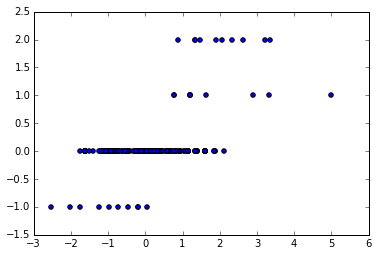

In [679]:
plt.scatter(cleaner_data,new_ness)